# Song Recommender Model

Dataset: [Million Song Dataset](http://millionsongdataset.com/)

Built using **Turi**.

Built by **Vishal Sharma**.

## Installing and Importing Libraries

In [2]:
!pip install turicreate

     |████████████████████████████████| 92.0MB 43kB/s 
     |████████████████████████████████| 86.4MB 67kB/s 
     |████████████████████████████████| 327kB 43.9MB/s 
     |████████████████████████████████| 3.4MB 39.9MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 450kB 43.0MB/s 
     |████████████████████████████████| 3.8MB 37.3MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320848 sha256=eb9d05f294e7dc1509d15dd12f9c71264dc6616c8c8ae66caac6601f35417c92
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for prettytable: filename=prettytable-0.7.2-cp36-none-any.whl size=13700 sha256=738e777bcf1c1e533e231cf1900d8567afc50b8b98adaa8121ed8725248b98e1
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=04

In [1]:
import turicreate as tc
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Loading and Pre-processing Dataset

In [79]:
# train_file = 'https://static.turi.com/datasets/millionsong/10000.txt'
#fetching the triplets file and songs metadata file
triplets_file = 'https://static.turi.com/datasets/millionsong/10000.txt'
# songs_metadata_file = 'https://static.turi.com/datasets/millionsong/song_data.csv'

#reading data files for each using pandas and then appending data to data frames with corresponding data frames
song_df_1 = pd.read_csv(triplets_file,header=None, sep='\t')
song_df_1.columns = ['user_id', 'song_id', 'listen_count']

# song_df_1 = song_df_1[:1000]
# song_df_1 = song_df_1.truncate(before=0, after=2000)
#Read song  metadata of songs 
# song_df_2 =  pd.read_csv(songs_metadata_file)

#Merge the two dataframes above to create input dataframe for recommender systems with duplicate column in both dataframes as song_id
# song_df = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on="song_id", how="left")

# sf = tc.SFrame.read_csv(song_df, header=False, delimiter='\t', verbose=False)
# sf.rename({'X1':'user_id', 'X2':'song_id', 'X3':'listen_count'}).show()

sf = tc.SFrame(song_df_1)

In [80]:
sf.explore()

/usr/local/lib/python3.6/dist-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))


,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [81]:
sf.show()

Materializing SFrame

### Train-test split

In [82]:
train_set, test_set = tc.recommender.util.random_split_by_user(sf, 'user_id', 'song_id', item_test_proportion=0.2)


## Building Models

In [92]:
popularity_model = tc.popularity_recommender.create(train_set, 'user_id', 'song_id', target = 'listen_count')

Preparing data set.

Data has 1994935 observations with 76346 users and 10000 items.

Data prepared in: 3.27697s

1994935 observations to process; with 10000 unique items.

In [93]:
item_sim_model = tc.item_similarity_recommender.create(train_set, 'user_id', 'song_id', target = 'listen_count')

Preparing data set.

Data has 1994935 observations with 76346 users and 10000 items.

Data prepared in: 3.20523s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.515ms                        | 1.25       |

| 92.553ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 186.772ms                           | 0                | 0               |

| 3.18s                               | 92               | 9212            |

| 4.77s                               | 100              | 10000           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 4.90982s

In [94]:
fac_model = tc.factorization_recommender.create(train_set, 'user_id', 'song_id', target = 'listen_count')

Preparing data set.

Data has 1994935 observations with 76346 users and 10000 items.

Data prepared in: 2.85142s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 249366 / 1994935 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | No Decrease (232.406 >= 40.2567)         |

| 1       | 6.25              | No Decrease (226.628 >= 40.2567)         |

| 2       | 1.5625            | No Decrease (196.762 >= 40.2567)         |

| 3       | 0.390625          | No Decrease (93.5739 >= 40.2567)         |

| 4       | 0.0976562         | 17.2249                                  |

| 5       | 0.0488281         | 10.4154                                  |

| 6       | 0.0244141         | 21.185                                   |

+---------+-------------------+------------------------------------------+

| Final   | 0.0488281         | 10.4154                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 98us         | 43.1753           | 6.57079               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 430.428ms    | 43.0119           | 6.55791               | 0.0488281   |

| 2       | 848.297ms    | 40.3307           | 6.35026               | 0.0290334   |

| 3       | 1.21s        | 37.8483           | 6.15173               | 0.0214205   |

| 4       | 1.62s        | 35.4803           | 5.95614               | 0.0172633   |

| 5       | 2.03s        | 33.5409           | 5.79102               | 0.014603    |

| 10      | 4.06s        | 26.461            | 5.1434                | 0.008683    |

| 20      | 8.07s        | 19.7779           | 4.44635               | 0.00516295  |

| 30      | 12.04s       | 16.5621           | 4.06859               | 0.00380916  |

| 40      | 16.03s       | 14.5661           | 3.81535               | 0.00306991  |

| 50      | 19.97s       | 13.4254           | 3.66276               | 0.00259682  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 12.2202

Final training RMSE: 3.49436

## Model Evaluation and Comparision

In [95]:
popularity_eval = popularity_model.evaluate(test_set)


Precision and recall summary statistics by cutoff
+--------+------------------------+------------------------+
| cutoff |     mean_precision     |      mean_recall       |
+--------+------------------------+------------------------+
|   1    |          0.0           |          0.0           |
|   2    |          0.0           |          0.0           |
|   3    |          0.0           |          0.0           |
|   4    |          0.0           |          0.0           |
|   5    |          0.0           |          0.0           |
|   6    |          0.0           |          0.0           |
|   7    |          0.0           |          0.0           |
|   8    | 0.00014124293785310738 | 0.00014124293785310738 |
|   9    | 0.00025109855618330194 | 0.0004237288135593221  |
|   10   | 0.0002259887005649718  | 0.0004237288135593221  |
+--------+------------------------+------------------------+
[10 rows x 3 columns]


Overall RMSE: 9.332319772727878

Per User RMSE (best)
+----------------

In [96]:
item_sim_eval = item_sim_model.evaluate(test_set)


Precision and recall summary statistics by cutoff
+--------+---------------------+---------------------+
| cutoff |    mean_precision   |     mean_recall     |
+--------+---------------------+---------------------+
|   1    | 0.21807909604519773 | 0.05774008056001987 |
|   2    | 0.18135593220338989 | 0.08517999550274657 |
|   3    |  0.1649717514124293 | 0.10826572253767468 |
|   4    | 0.14830508474576265 | 0.12746196493496784 |
|   5    |  0.135819209039548  | 0.14371763748381802 |
|   6    |  0.124105461393597  | 0.15403499519097594 |
|   7    |  0.115092816787732  |  0.1619004418252499 |
|   8    | 0.10649717514124293 |  0.1677635241972725 |
|   9    | 0.10043942247332077 | 0.17429328122134966 |
|   10   | 0.09559322033898307 | 0.18405961511950064 |
+--------+---------------------+---------------------+
[10 rows x 3 columns]


Overall RMSE: 10.003877841586132

Per User RMSE (best)
+-------------------------------+--------------------+-------+
|            user_id            |    

In [97]:
fac_eval = fac_model.evaluate(test_set)


Precision and recall summary statistics by cutoff
+--------+------------------------+-----------------------+
| cutoff |     mean_precision     |      mean_recall      |
+--------+------------------------+-----------------------+
|   1    |          0.0           |          0.0          |
|   2    |          0.0           |          0.0          |
|   3    |          0.0           |          0.0          |
|   4    | 0.00028248587570621475 | 0.0003766478342749529 |
|   5    | 0.0009039548022598871  | 0.0011676082862523537 |
|   6    |  0.001129943502824859  | 0.0017325800376647835 |
|   7    | 0.0009685230024213074  | 0.0017325800376647835 |
|   8    | 0.0008474576271186442  | 0.0017325800376647841 |
|   9    | 0.0008788449466415567  |  0.002015065913370998 |
|   10   |  0.001016949152542373  | 0.0021568627450980395 |
+--------+------------------------+-----------------------+
[10 rows x 3 columns]


Overall RMSE: 12.916948640539658

Per User RMSE (best)
+-----------------------------

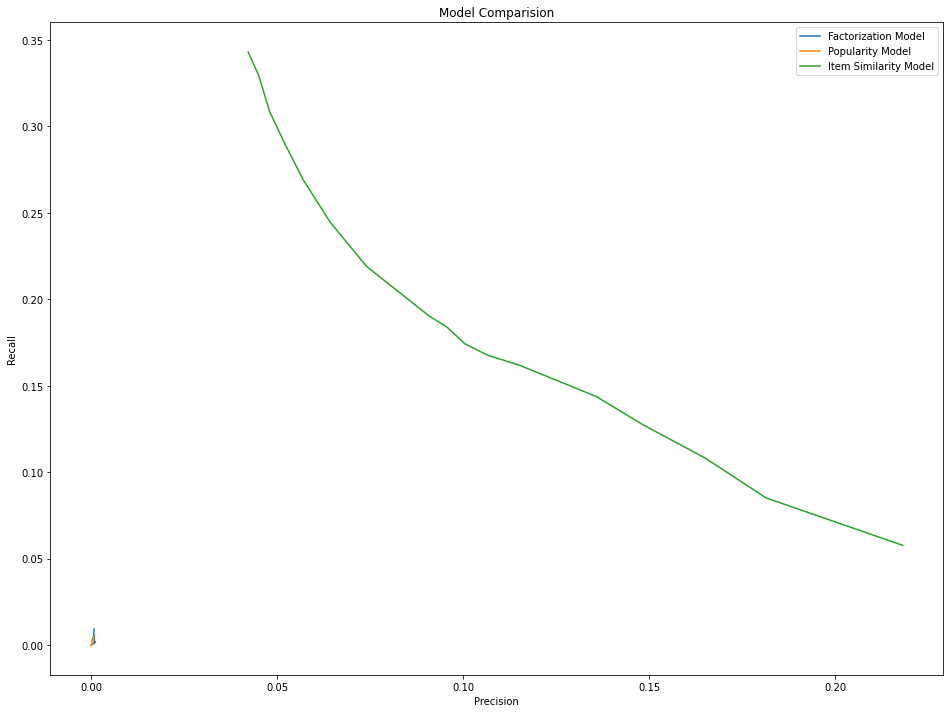

In [98]:
# fac_model['precision_recall_overall']['cutoff']
plt.figure(figsize=(16, 12))
plt.plot(fac_eval['precision_recall_overall']['precision'], fac_eval['precision_recall_overall']['recall'], label = "Factorization Model")
plt.plot(popularity_eval['precision_recall_overall']['precision'], popularity_eval['precision_recall_overall']['recall'], label = "Popularity Model")
plt.plot(item_sim_eval['precision_recall_overall']['precision'], item_sim_eval['precision_recall_overall']['recall'], label = "Item Similarity Model")
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Model Comparision')
plt.legend()
plt.show()

## Results and Recommendations

Based on precision recall graph we can conclude that item similarity model performed the best.

In [99]:
K = 10
users = tc.SArray(sf['user_id'].unique().head(100))

In [100]:
recs = item_sim_model.recommend(users=users, k=K)
recs.head()

user_id,song_id,score,rank
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,SOYQQAC12A6D4FD59E,0.04051723919416729,1
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,SOZOIUU12A67ADFA39,0.03726111901433844,2
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,SOXKFRI12A8C137A5F,0.037244407754195366,3
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,SODWUBY12A6D4F8E8A,0.03617893394670988,4
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,SONYKOW12AB01849C9,0.03283777676130596,5
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,SOOAOHX12A6D4F8E8C,0.032115387289147625,6
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,SOLFXKT12AB017E3E0,0.03172684656946283,7
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,SOSELMV12A6D4FCF5A,0.030348774633909528,8
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,SOTWNDJ12A8C143984,0.02976889359323602,9
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,SOAXGDH12A8C13F8A1,0.02929497706262689,10


Merging metadata of all songs

In [101]:
# Get the meta data of the songs

# The below will download a 75 MB file.
songs = tc.SFrame.read_csv('https://static.turi.com/datasets/millionsong/song_data.csv', verbose=False)
songs = songs[['song_id', 'title', 'artist_name']]
results = recs.join(songs, on='song_id', how='inner')

# Populate observed user-song data with song info
userset = frozenset(users)
ix = sf['user_id'].apply(lambda x: x in userset, int)  
user_data = sf[ix]
user_data = user_data.join(songs, on='song_id')[['user_id', 'title', 'artist_name']]

In [106]:
# Print out some recommendations 
for i in range(5):
    user = list(users)[i]
    print("User: " + str(i + 1))
    user_obs = user_data[user_data['user_id'] == user].head(K)
    del user_obs['user_id']
    user_recs = results[results['user_id'] == str(user)][['title', 'artist_name']]

    print("Songs liked by User: ")
    print(user_obs.head(K))

    print("Further song recommendation by our model:")
    print(user_recs.head(K))

    print("")

User: 1
Songs liked by User: 
+---------------------------+-------------------------+
|           title           |       artist_name       |
+---------------------------+-------------------------+
|      No Me Ensenaste      |          Thalia         |
|   Love Is A Losing Game   |      Amy Winehouse      |
|    You Know I'm No Good   |      Amy Winehouse      |
|         Las flores        |       Café Tacvba       |
|        No One Knows       | Queens Of The Stone Age |
|     Burden In My Hand     |       Soundgarden       |
|    Rain On Your Parade    |          Duffy          |
|   Declaration of Purpose  |   Brilliant Red Lights  |
| Uninvited (Album Version) |    Alanis Morissette    |
|       Peligroso Pop       |     Plastilina Mosh     |
+---------------------------+-------------------------+
[10 rows x 2 columns]

Further song recommendation by our model:
+--------------------------------+------------------------+
|             title              |      artist_name       |
+